In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy import stats
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

tf.keras.utils.set_random_seed(12397) #seed to increase model comparison integrity

#define columns
attributes = [ 
    'Times Pregnant',
    'Plasma Glucose',
    'Blood Pressure',
    'Triceps Skin Fold',
    'Insulin',
    'BMI',
    'DPF',
    'Age',
    'Outcome'
]

#read data
data_file = 'pima-indians-diabetes.csv' 
data = pd.read_csv(data_file, names=attributes)

data = data.drop_duplicates() #remove duplicates

#replace 0 entries with column median, avoiding births and outcome
for col in attributes[1:-1]: 
    data[col] = data[col].replace(0,data[col].median())
    
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)] #remove rows with outliers
data = (data-data.min())/(data.max()-data.min()) #min-max normalize
#print(data.describe()) I used describe to check and verify details about the dataset

#split data approx 75/25
train = data[:540]
train_in = train.iloc[:,:-1]
train_out = train['Outcome']

test = data[540:]
test_in = test.iloc[:,:-1]
test_out = test['Outcome']

ModuleNotFoundError: No module named 'pandas'

Prediction accuracy:  0.7039106145251397


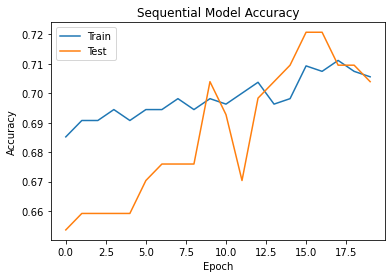

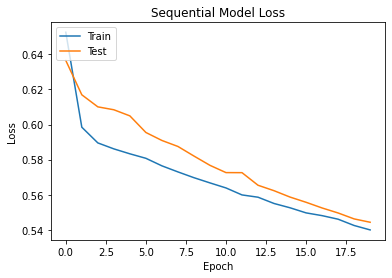

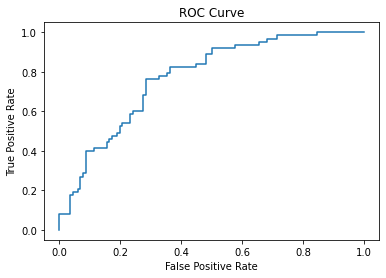

In [2]:
#baseline sequential model
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation=tf.nn.relu),
    tf.keras.layers.Dense(1),])

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist = net.fit(train_in, train_out, epochs=20, batch_size=128, validation_data=(test_in, test_out), verbose=0)

test_pred = net.predict(test_in) #make some predictions
fpr, tpr, thresholds = roc_curve(test_out, test_pred) #create roc numbers

#format predictions to check accuracy
pred_results = (test_pred > 0.5).astype(int)
pred_results = pd.DataFrame(pred_results, columns=['Outcome'])
test_out = test_out.astype(int)
test_out = test_out.reset_index(drop=True)

#count correct predictions and calculate accuracy
corr = pred_results.eq(test_out,axis=0)
acc = corr.sum(axis=0)/len(corr)
acc = acc[0]
print("Prediction accuracy: ", acc)

#plot training accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Sequential Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Sequential Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot roc
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Prediction accuracy:  0.8212290502793296


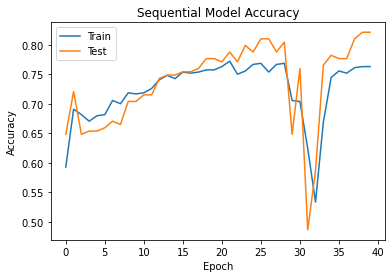

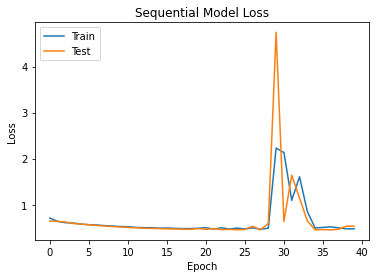

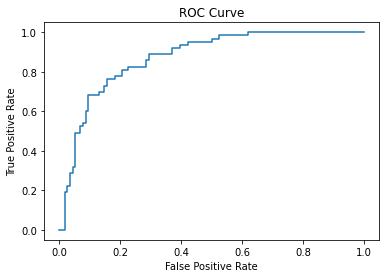

In [3]:
#sigmoid w/ adam, learning rate .01, 40 epochs, batch 64
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1),])

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist = net.fit(train_in, train_out, epochs=40, batch_size=64, validation_data=(test_in, test_out), verbose=0)

test_pred = net.predict(test_in) #make some predictions
fpr, tpr, thresholds = roc_curve(test_out, test_pred) #create roc numbers

#format predictions to check accuracy
pred_results = (test_pred > 0.5).astype(int)
pred_results = pd.DataFrame(pred_results, columns=['Outcome'])
test_out = test_out.astype(int)
test_out = test_out.reset_index(drop=True)

#count correct predictions and calculate accuracy
corr = pred_results.eq(test_out,axis=0)
acc = corr.sum(axis=0)/len(corr)
acc = acc[0]
print("Prediction accuracy: ", acc)

#plot training accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Sequential Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Sequential Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot roc
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Prediction accuracy:  0.770949720670391


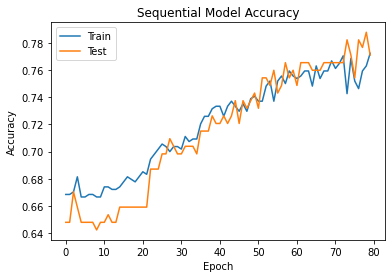

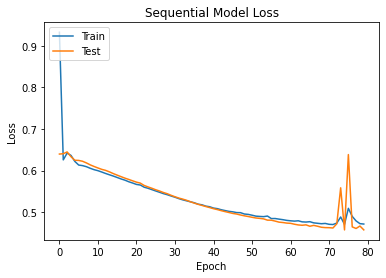

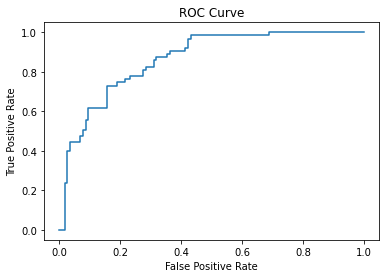

In [4]:
#sigmoid w/ adam, 80 epochs, batch size 64, .005 learning rate
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1),])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist = net.fit(train_in, train_out, epochs=80, batch_size=64, validation_data=(test_in, test_out), verbose=0)

test_pred = net.predict(test_in) #make some predictions
fpr, tpr, thresholds = roc_curve(test_out, test_pred) #create roc numbers

#format predictions to check accuracy
pred_results = (test_pred > 0.5).astype(int)
pred_results = pd.DataFrame(pred_results, columns=['Outcome'])
test_out = test_out.astype(int)
test_out = test_out.reset_index(drop=True)

#count correct predictions and calculate accuracy
corr = pred_results.eq(test_out,axis=0)
acc = corr.sum(axis=0)/len(corr)
acc = acc[0]
print("Prediction accuracy: ", acc)

#plot training accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Sequential Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Sequential Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot roc
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Prediction accuracy:  0.776536312849162


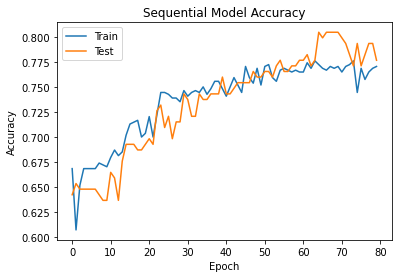

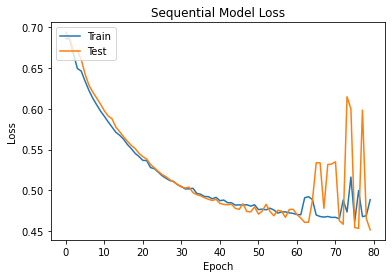

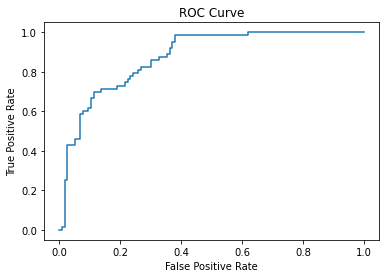

In [5]:
#sigmoid w/ adam, 80 epochs, .005 learning rate
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation=tf.keras.activations.sigmoid),
    tf.keras.layers.Dense(1),])

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist = net.fit(train_in, train_out, epochs=80, batch_size=128, validation_data=(test_in, test_out), verbose=0)

test_pred = net.predict(test_in) #make some predictions
fpr, tpr, thresholds = roc_curve(test_out, test_pred) #create roc numbers

#format predictions to check accuracy
pred_results = (test_pred > 0.5).astype(int)
pred_results = pd.DataFrame(pred_results, columns=['Outcome'])
test_out = test_out.astype(int)
test_out = test_out.reset_index(drop=True)

#count correct predictions and calculate accuracy
corr = pred_results.eq(test_out,axis=0)
acc = corr.sum(axis=0)/len(corr)
acc = acc[0]
print("Prediction accuracy: ", acc)

#plot training accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Sequential Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Sequential Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot roc
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Prediction accuracy:  0.659217877094972


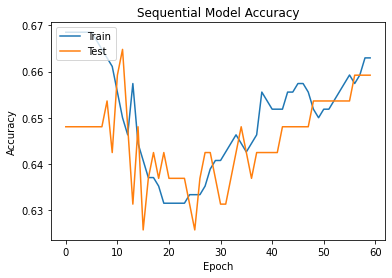

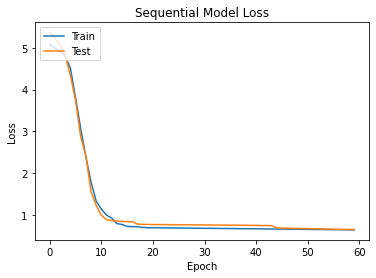

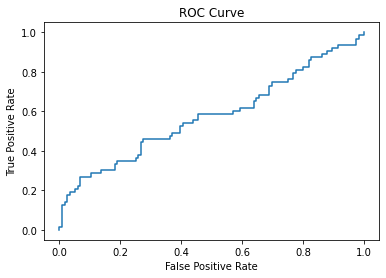

In [6]:
#relu w/ adam, 60 epochs, .002 learning rate, batch 128
net = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1),])

opt = tf.keras.optimizers.Adam(learning_rate=0.002)
net.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
hist = net.fit(train_in, train_out, epochs=60, batch_size=128, validation_data=(test_in, test_out), verbose=0)

test_pred = net.predict(test_in) #make some predictions
fpr, tpr, thresholds = roc_curve(test_out, test_pred) #create roc numbers

#format predictions to check accuracy
pred_results = (test_pred > 0.5).astype(int)
pred_results = pd.DataFrame(pred_results, columns=['Outcome'])
test_out = test_out.astype(int)
test_out = test_out.reset_index(drop=True)

#count correct predictions and calculate accuracy
corr = pred_results.eq(test_out,axis=0)
acc = corr.sum(axis=0)/len(corr)
acc = acc[0]
print("Prediction accuracy: ", acc)

#plot training accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Sequential Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Sequential Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot roc
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()